# Identify the common entities across different relationships
***
Find node degree of the common entities and do a correlation analysis and visualize the results.

In [1]:
from analysis.analysis_utils import merge_df, calculate_common_node_degree
from analysis_utils import (
    load_data,
    merge_df,
    get_common_entities,
    plot_venn_diagram,
    calculate_common_node_degree,
    plot_common_entity_node_degree_distribution
)

import pandas as pd
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

In [2]:
# Load microbe-disease data from both disbiome and gmmad2 datasets
disbiome_md_df = load_data("../data/MAGNN_data/disbiome_taxid_mondo.dat", colname1="microbe", colname2="disease")
gmmad2_md_df = load_data("../data/MAGNN_data/gmmad2_taxid_mondo.dat", colname1="microbe", colname2="disease")
md_df = merge_df([disbiome_md_df, gmmad2_md_df])

Total count of edges: 
microbe    505325
disease    505325
dtype: int64


In [3]:
# Load microbe-metabolite data from both hmdb and gmmad2 datasets
hmdb_mm_df = load_data("../data/MAGNN_data/hmdb_taxid_met.dat", colname1="microbe", colname2="metabolite")
gmmad2_mm_df = load_data("../data/MAGNN_data/gmmad2_taxid_met.dat", colname1="microbe", colname2="metabolite")
mm_df = merge_df([hmdb_mm_df, gmmad2_mm_df])

Total count of edges: 
microbe       599176
metabolite    599176
dtype: int64


In [4]:
# Load metabolite-disease data from hmdb
metd_df = load_data("../data/MAGNN_data/hmdb_met_disease.dat", colname1="metabolite", colname2="disease")

In [5]:
common_microbe = get_common_entities(md_df, mm_df, "microbe", labels="Microbe-Disease and Microbe-Metabolite")
common_disease = get_common_entities(md_df, metd_df, "disease", labels="Microbe-Disease and Metabolite-Disease")
common_metabolite = get_common_entities(mm_df, metd_df, "metabolite", labels="Microbe-Metabolite and Metabolite-Disease")

There are 273 common microbe entities between Microbe-Disease and Microbe-Metabolite.
There are 40 common disease entities between Microbe-Disease and Metabolite-Disease.
There are 483 common metabolite entities between Microbe-Metabolite and Metabolite-Disease.


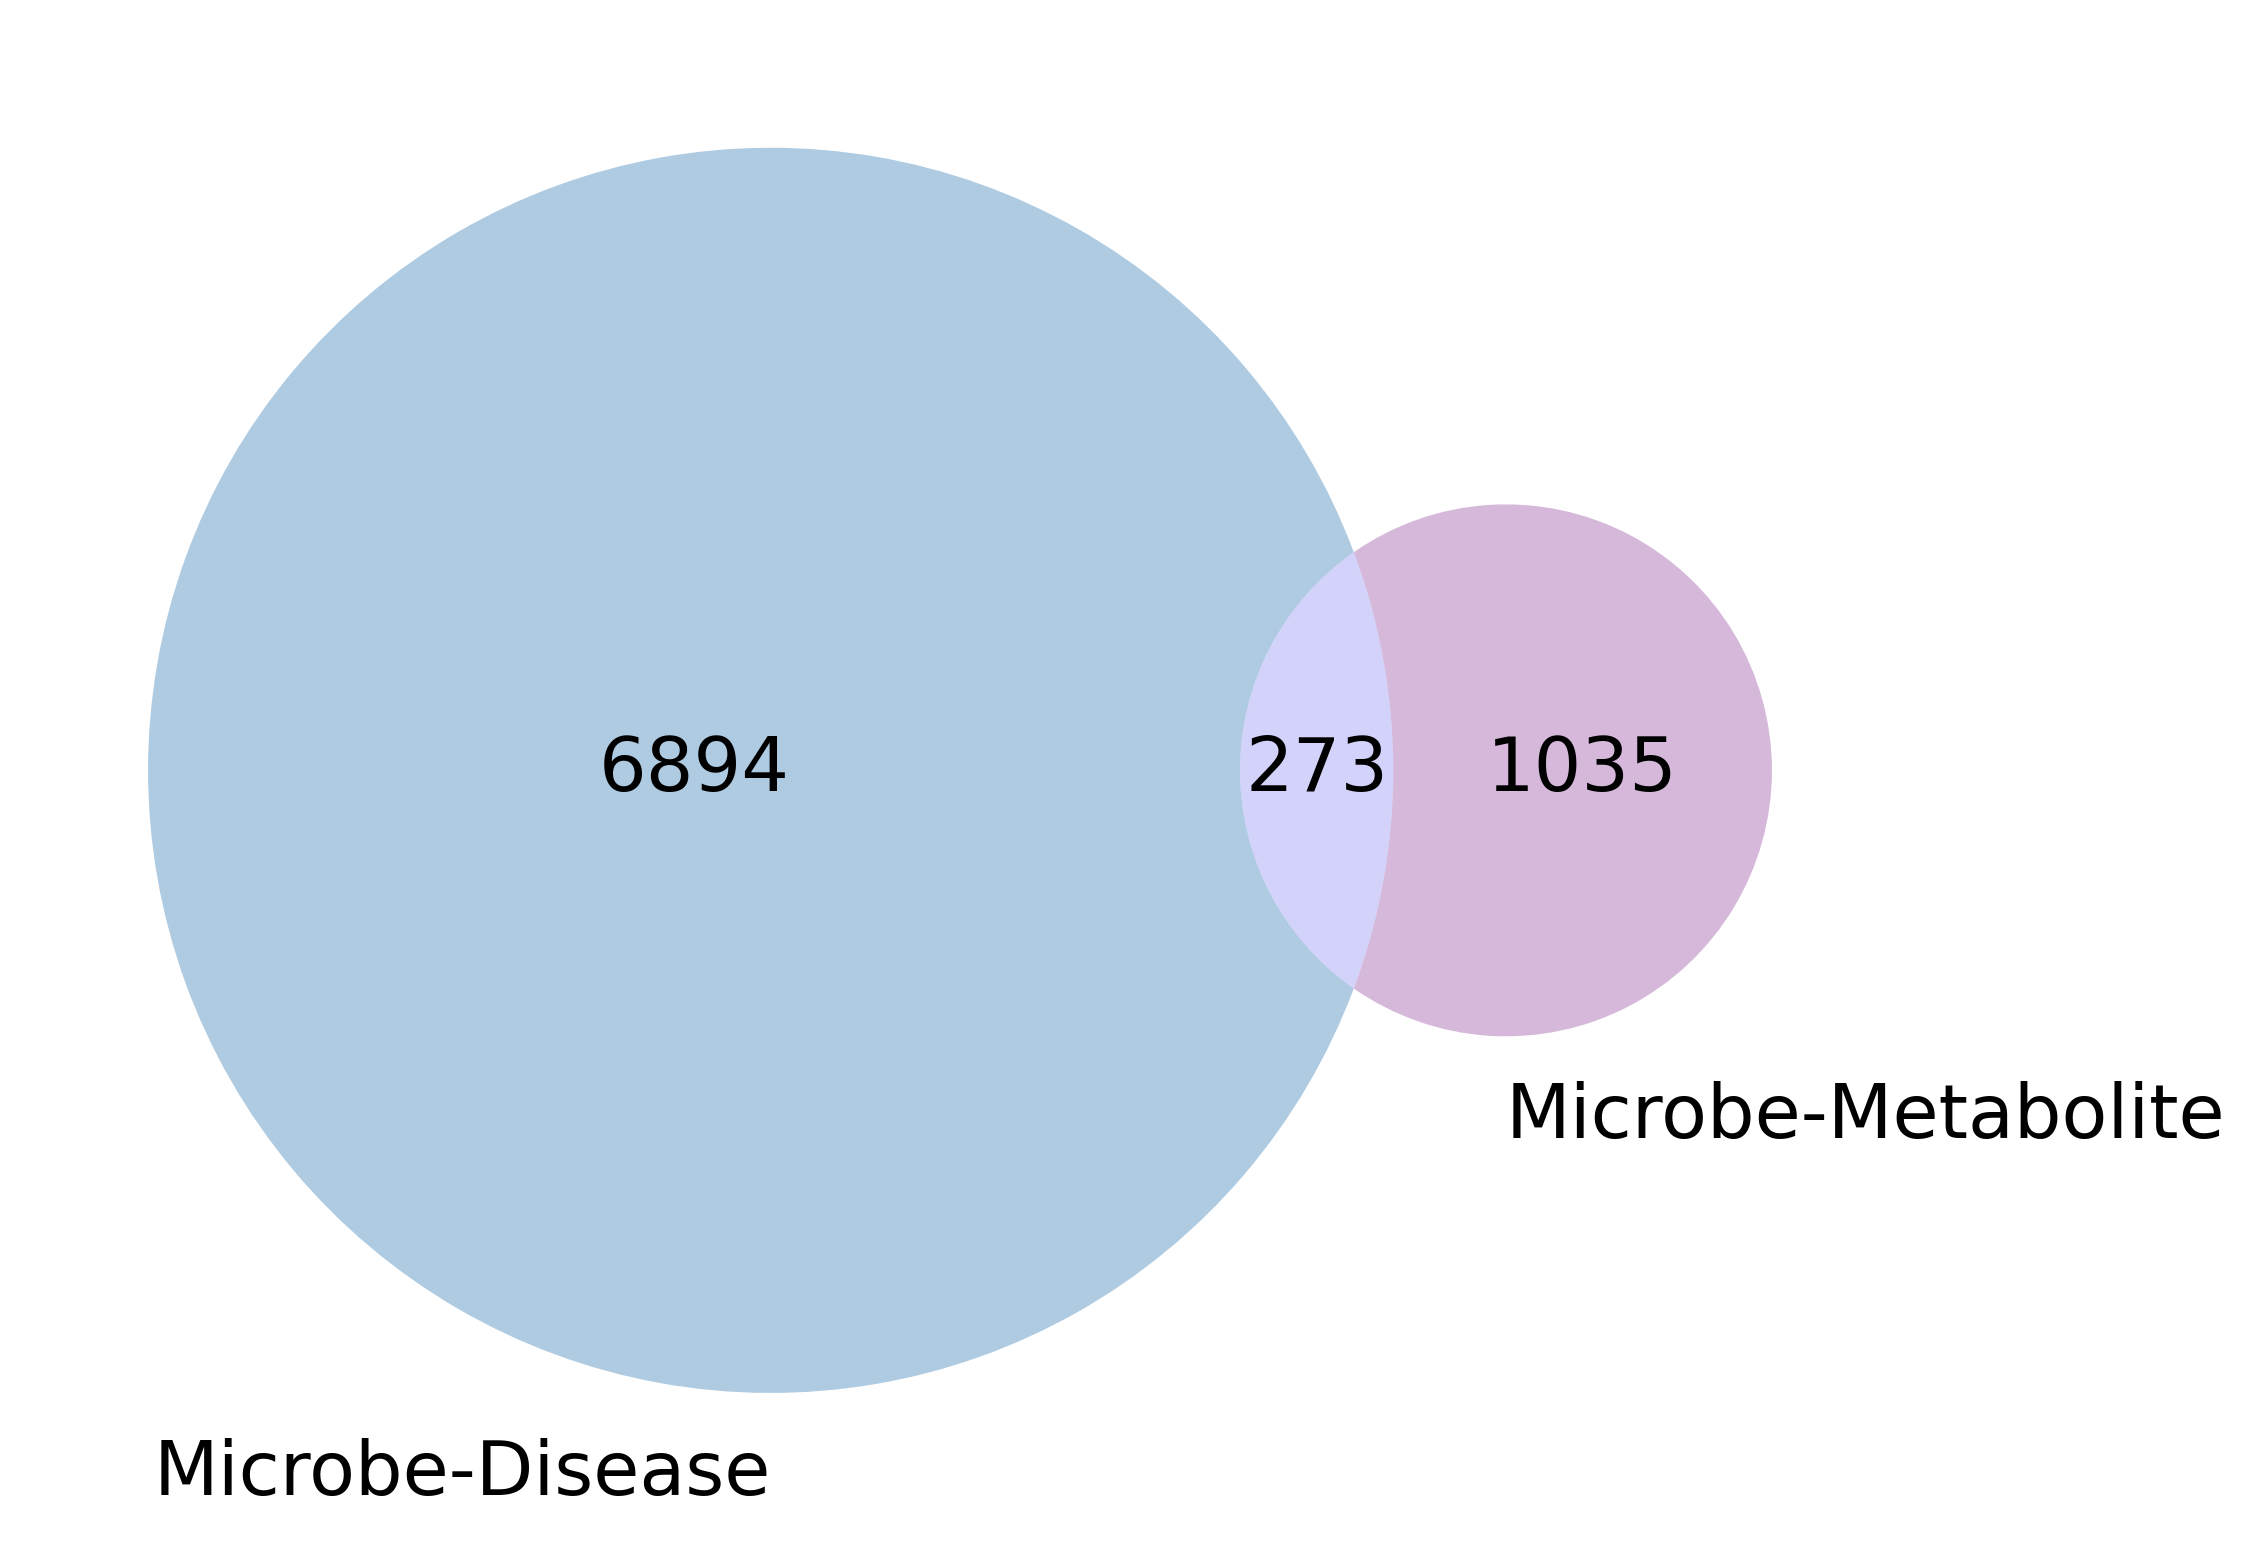

In [6]:
plot_venn_diagram([set(md_df["microbe"]), set(mm_df["microbe"])], 
                  ["Microbe-Disease", "Microbe-Metabolite"], 
                  colors=["#377eb8", "#984ea3"],
                  save_path="plots/correlation/venn_microbe.pdf")

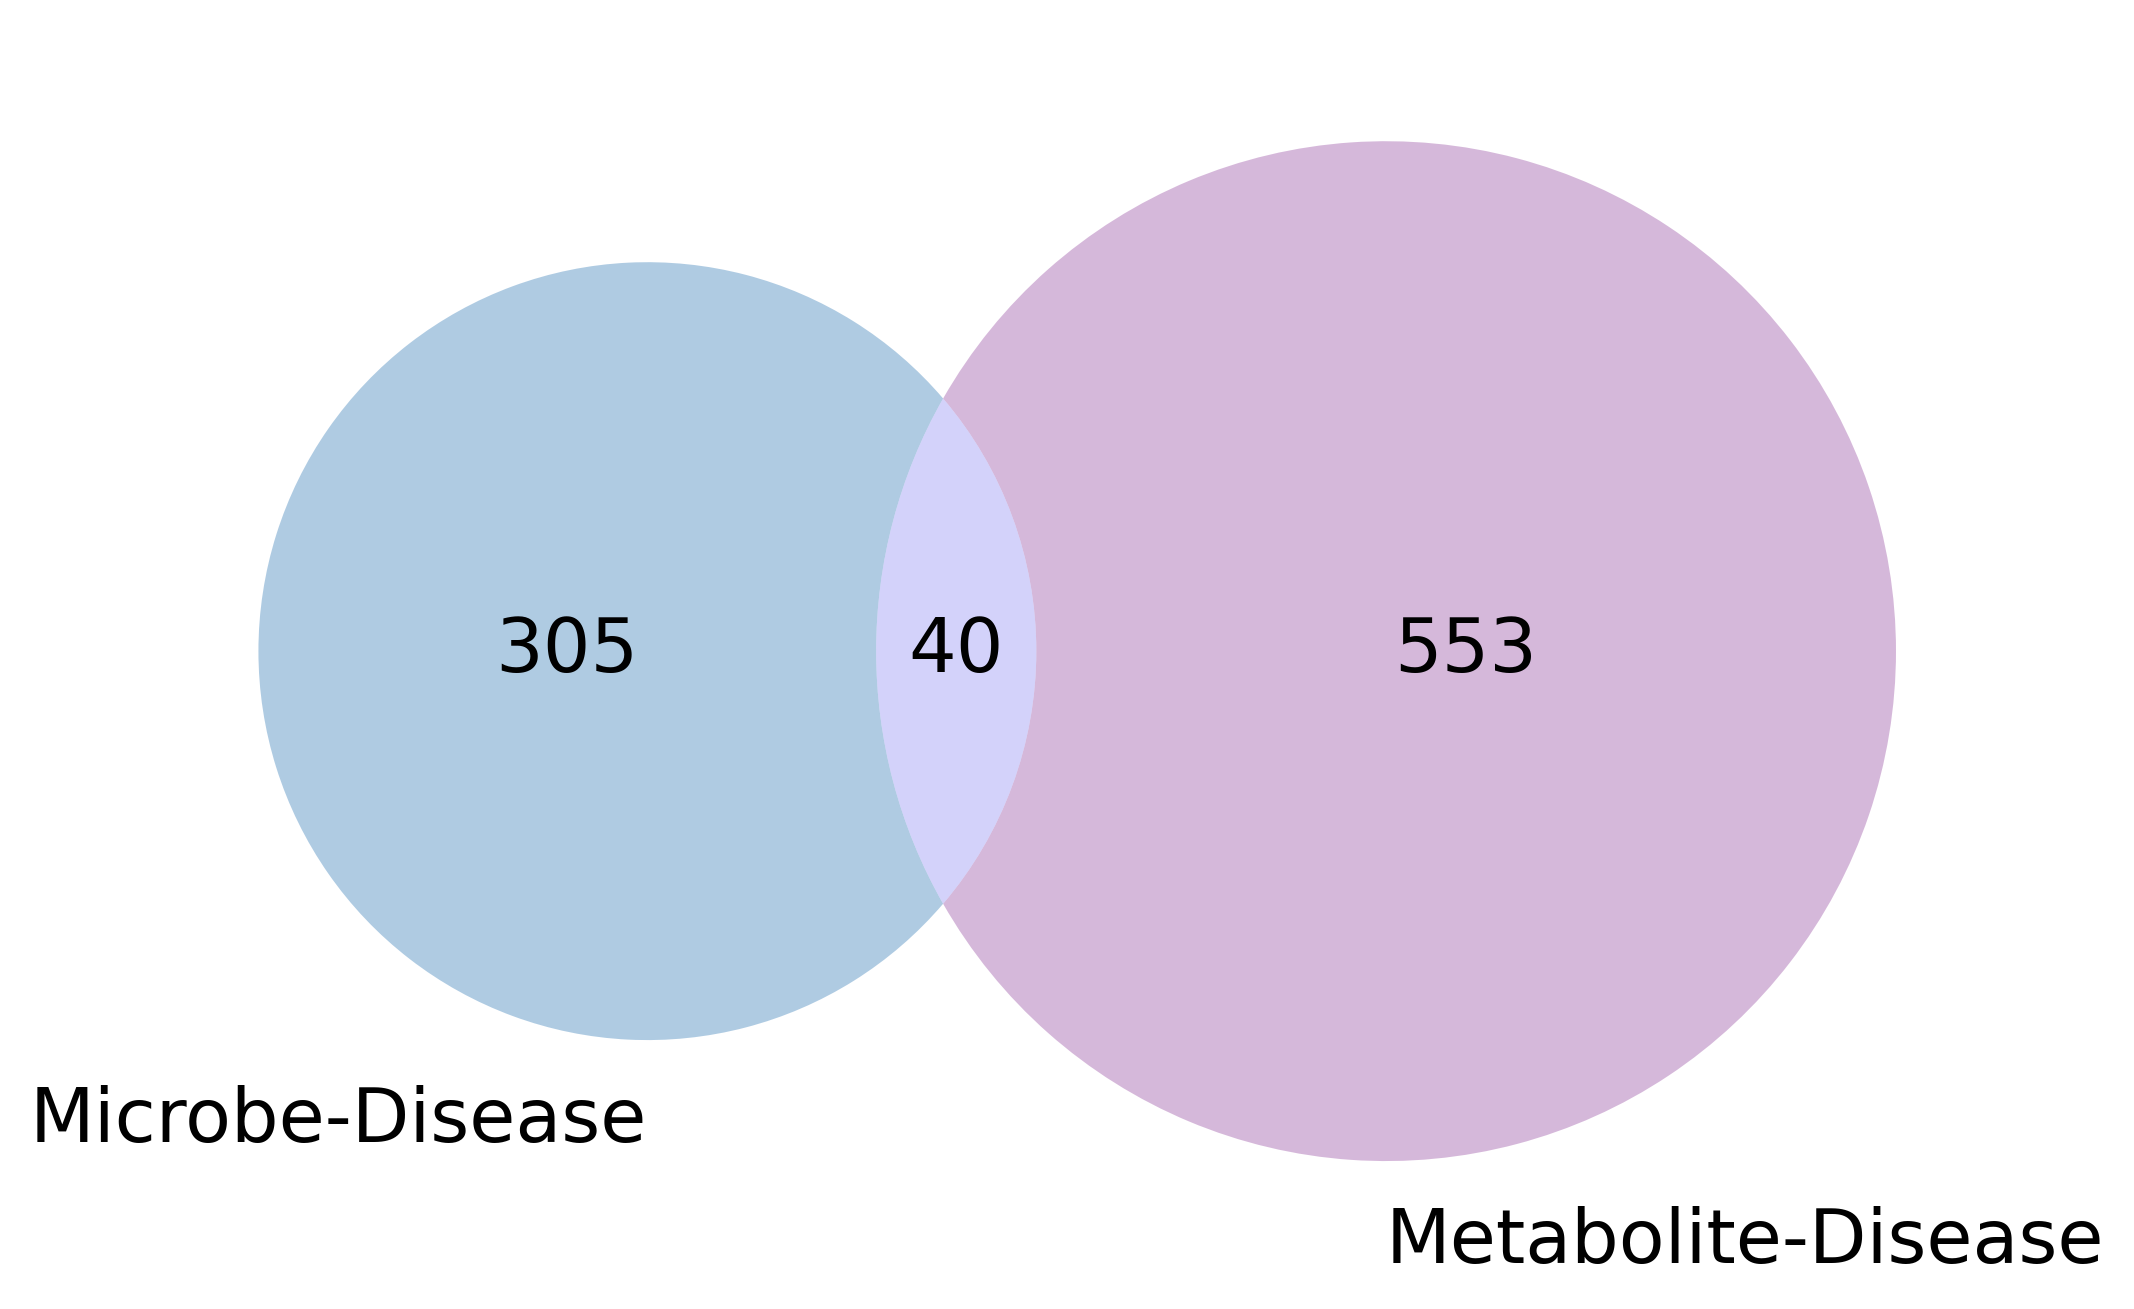

In [7]:
plot_venn_diagram([set(md_df["disease"]), set(metd_df["disease"])], 
                  ["Microbe-Disease", "Metabolite-Disease"],
                  colors=["#377eb8", "#984ea3"],
                  save_path="plots/correlation/venn_disease.pdf")

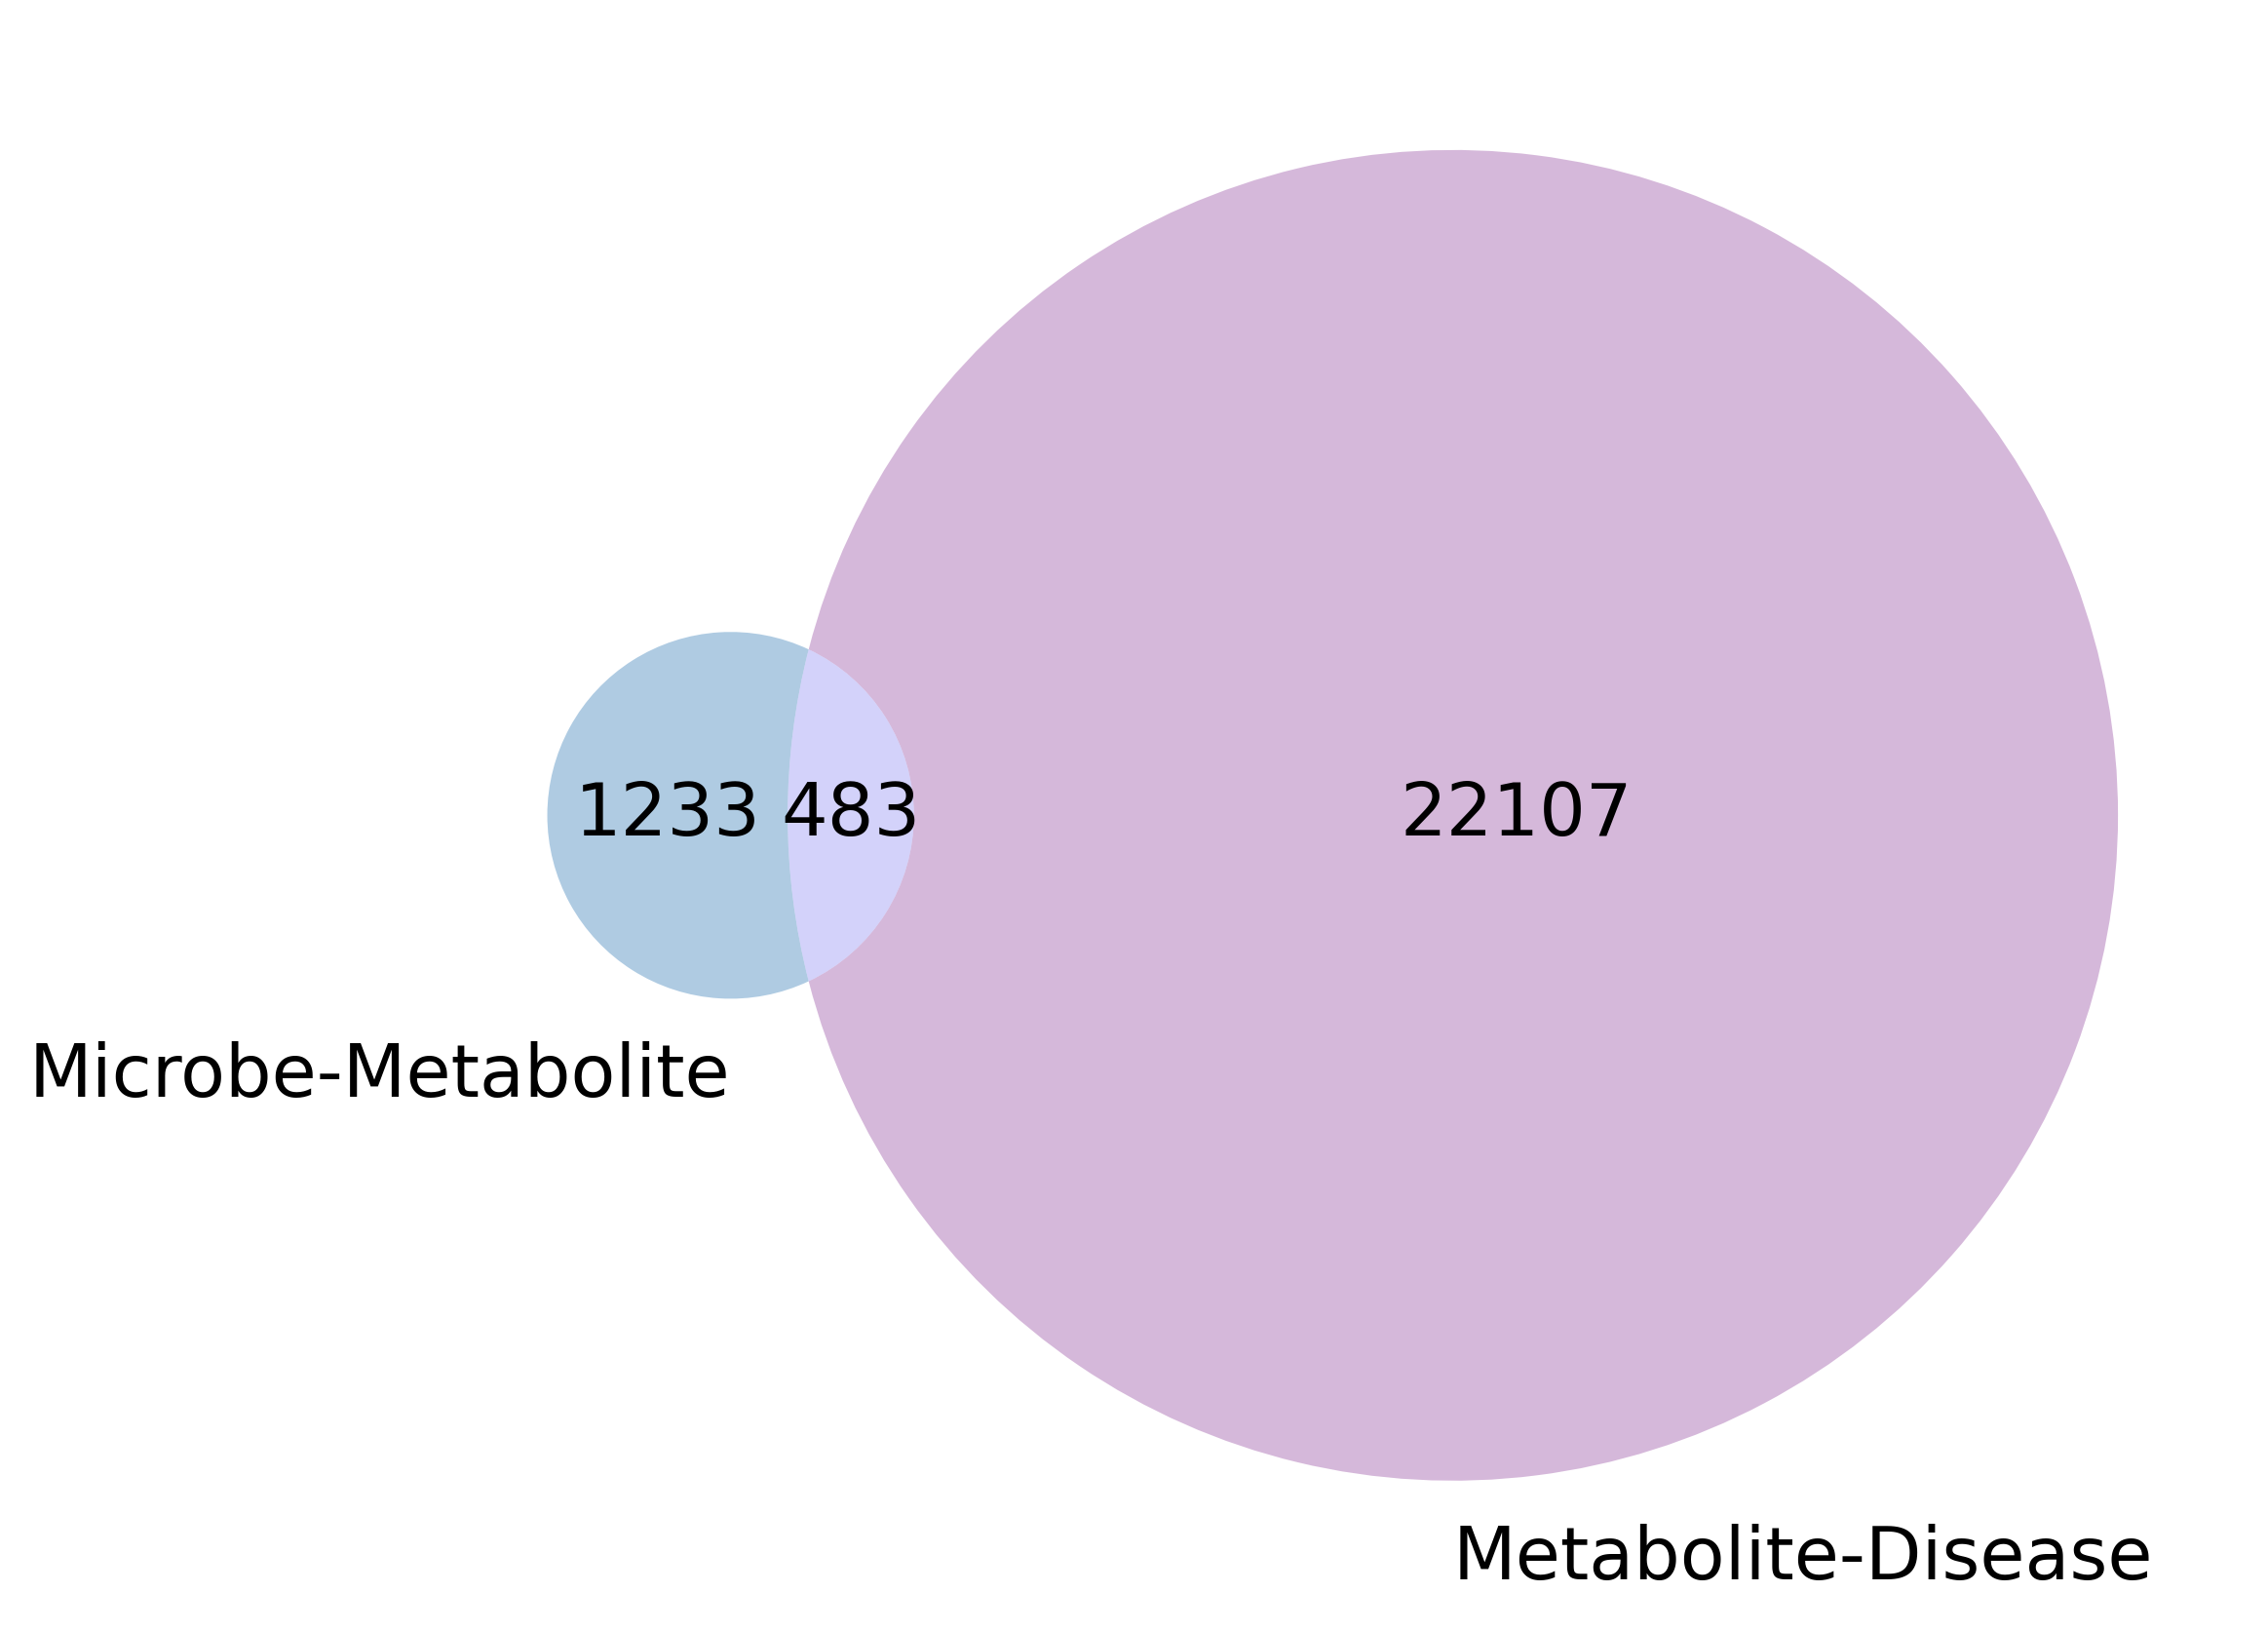

In [8]:
plot_venn_diagram([set(mm_df["metabolite"]), set(metd_df["metabolite"])], 
                  ["Microbe-Metabolite", "Metabolite-Disease"],
                  colors=["#377eb8", "#984ea3"],
                  save_path="plots/correlation/venn_metabolite.pdf")

In [9]:
node_d4microbe = calculate_common_node_degree(md_df, mm_df, "microbe", common_microbe)
node_d4microbe

[('NCBITaxon:562', 105, 921),
 ('NCBITaxon:244366', 82, 941),
 ('NCBITaxon:469613', 82, 869),
 ('NCBITaxon:1399', 82, 856),
 ('NCBITaxon:35841', 82, 835),
 ('NCBITaxon:1296', 82, 818),
 ('NCBITaxon:329', 83, 812),
 ('NCBITaxon:563193', 82, 791),
 ('NCBITaxon:105841', 82, 790),
 ('NCBITaxon:457395', 82, 790),
 ('NCBITaxon:469592', 82, 769),
 ('NCBITaxon:469588', 82, 753),
 ('NCBITaxon:818', 87, 748),
 ('NCBITaxon:457387', 82, 749),
 ('NCBITaxon:552398', 82, 744),
 ('NCBITaxon:469591', 82, 735),
 ('NCBITaxon:457421', 82, 733),
 ('NCBITaxon:457394', 82, 721),
 ('NCBITaxon:658089', 82, 713),
 ('NCBITaxon:457391', 82, 712),
 ('NCBITaxon:469593', 82, 705),
 ('NCBITaxon:469590', 82, 704),
 ('NCBITaxon:457392', 82, 699),
 ('NCBITaxon:457412', 82, 698),
 ('NCBITaxon:411484', 82, 695),
 ('NCBITaxon:187327', 82, 688),
 ('NCBITaxon:457390', 82, 688),
 ('NCBITaxon:585544', 82, 685),
 ('NCBITaxon:1042156', 82, 684),
 ('NCBITaxon:457396', 82, 674),
 ('NCBITaxon:469585', 82, 667),
 ('NCBITaxon:469589'

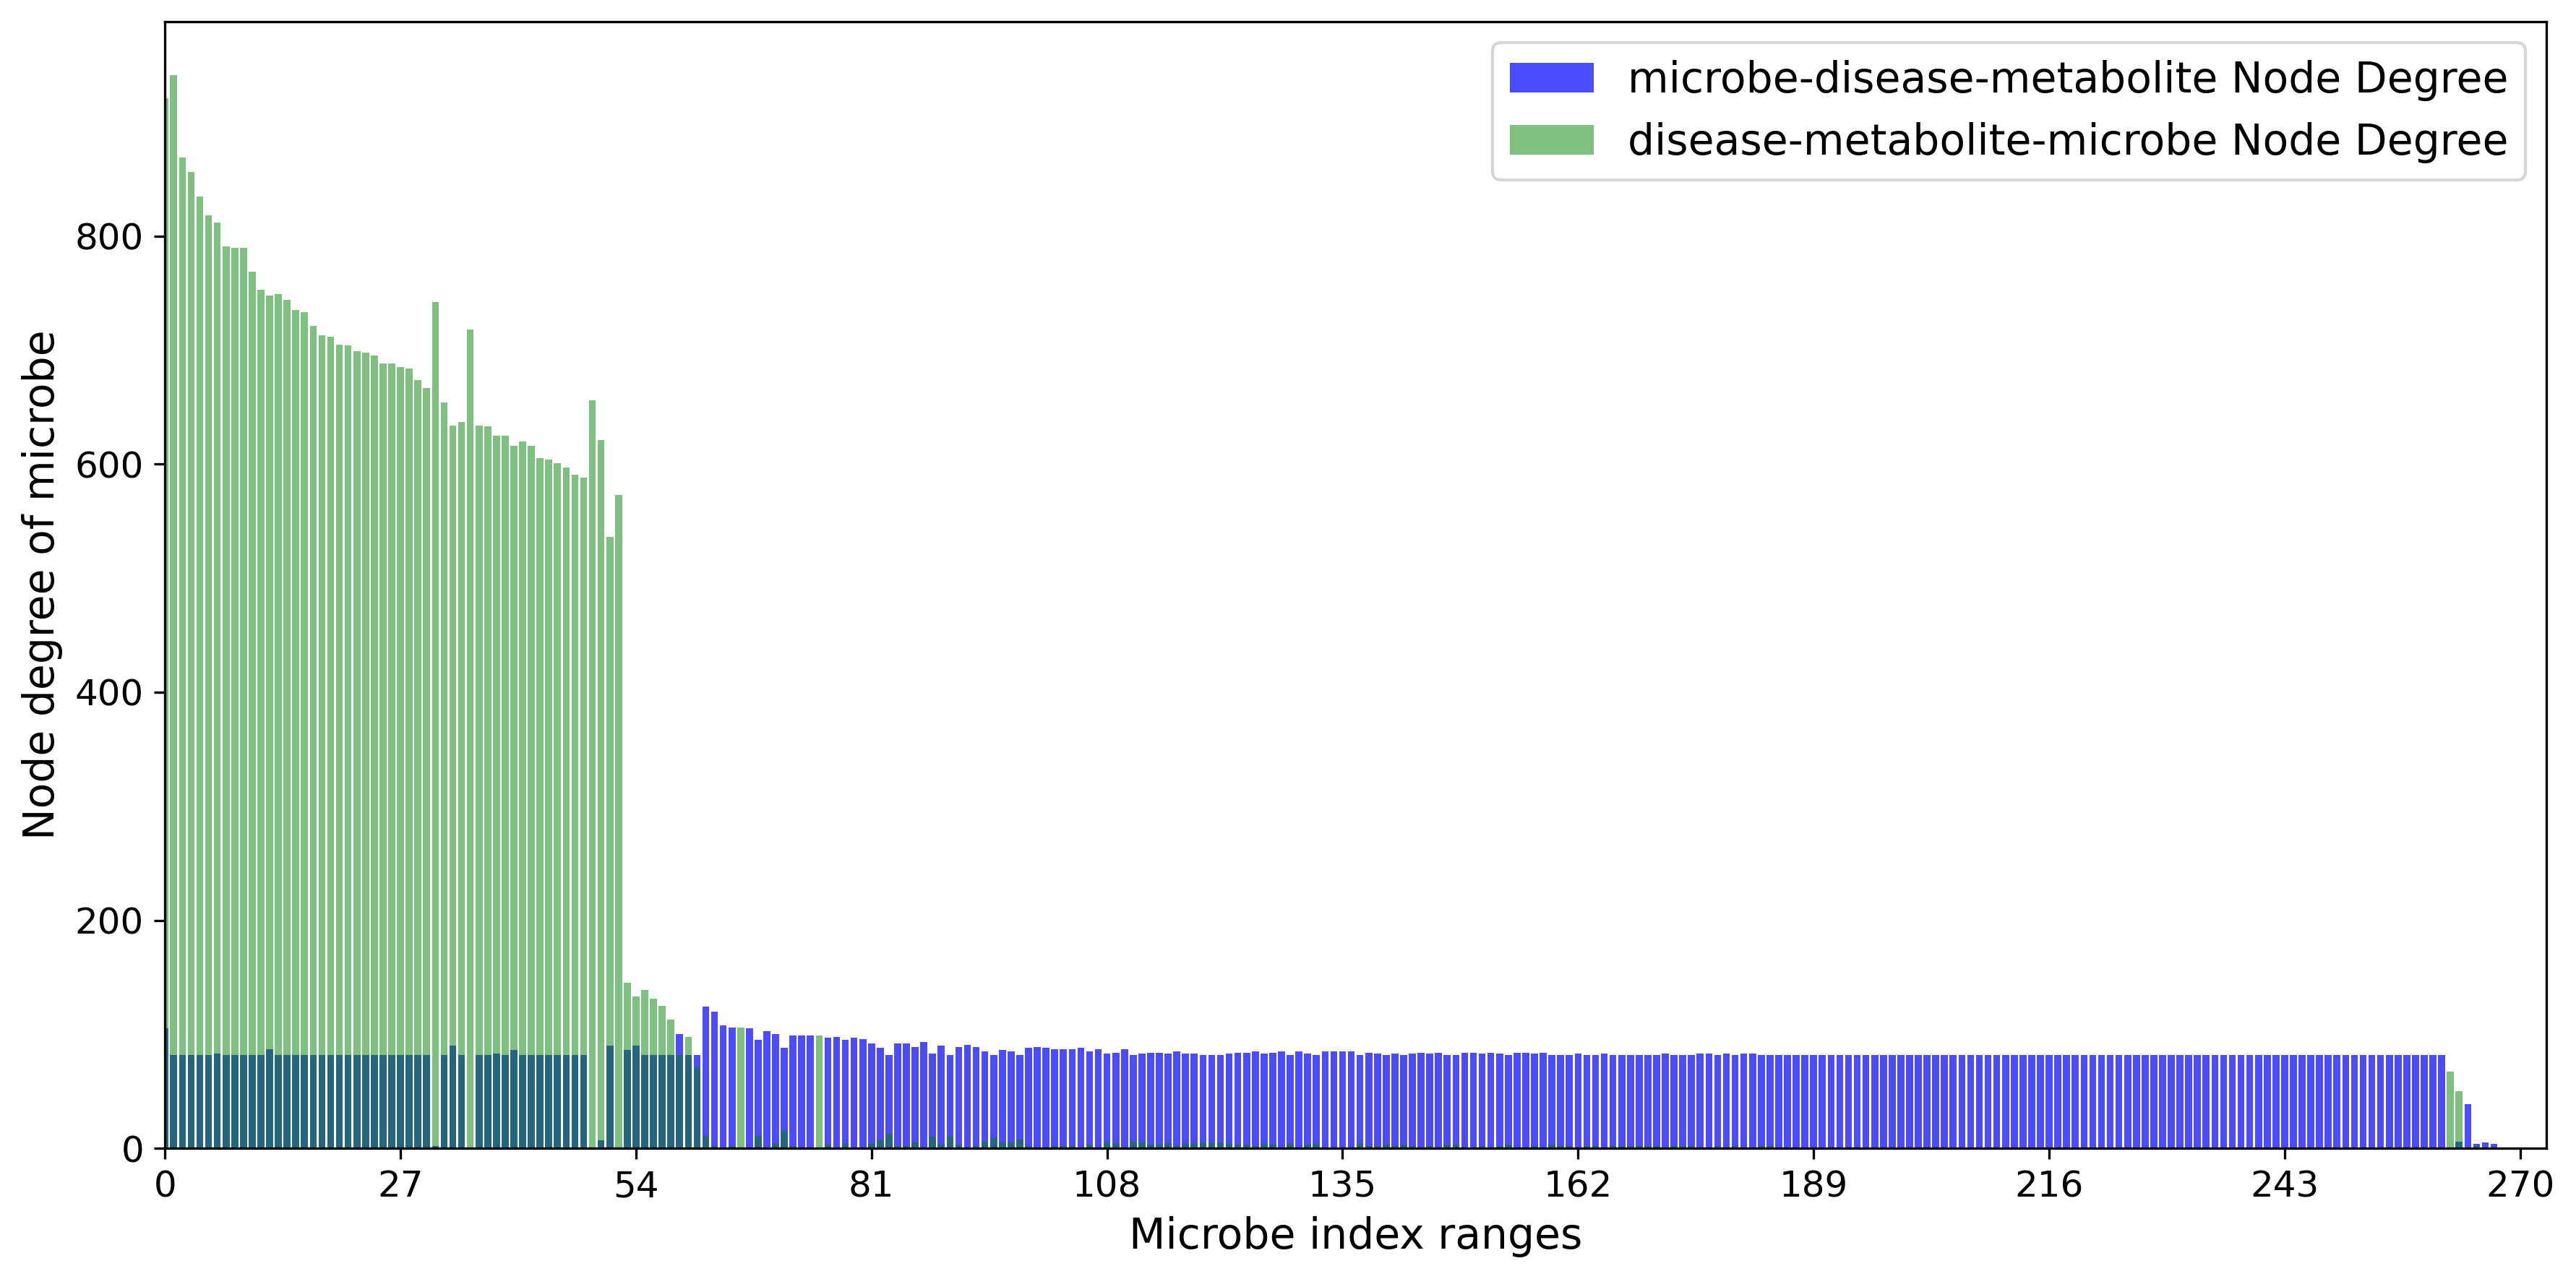

In [10]:
# Example usage
plot_common_entity_node_degree_distribution(
    entity_counts=node_d4microbe,
    entity_name1="microbe",
    entity_name2="disease-metabolite",
    color="blue"
)